## 1- Importing Libararies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

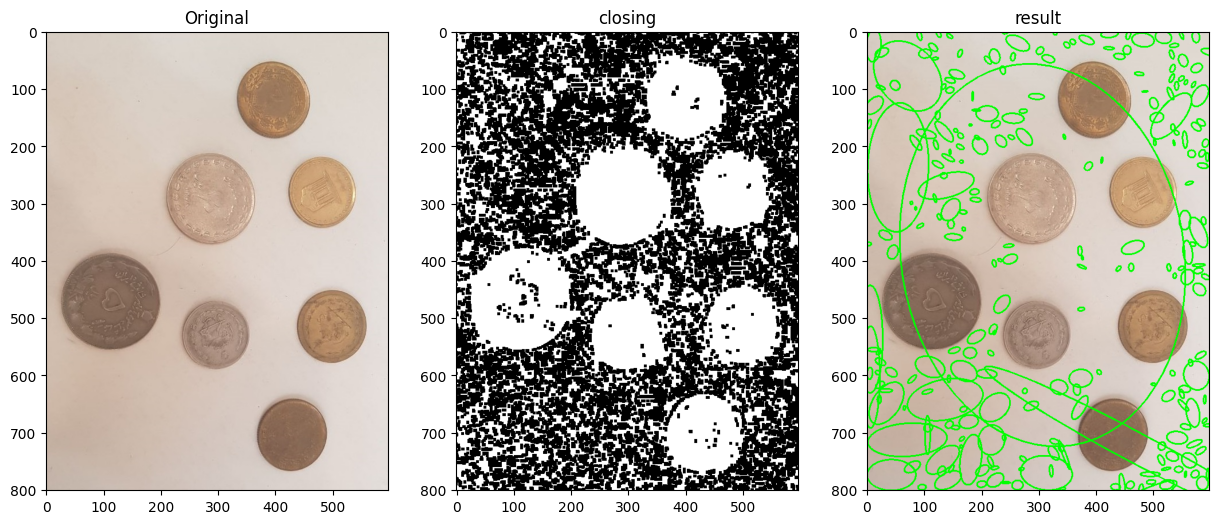

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/old-iranian-coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

drawing_image = image.copy()
for cnt in contours:
    if len(cnt) < 5:
        continue
    if cv2.contourArea(cnt) < 10:  # Filter small contours by area
        continue
    ellipse = cv2.fitEllipse(cnt)
    if ellipse[1][0] < 0 or ellipse[1][1] < 0:  # Ensure width and height are non-negative
        print(f"Invalid ellipse dimensions: {ellipse[1]}")
        continue
    cv2.ellipse(drawing_image, ellipse, (0, 255, 0), 2)

plt.figure(figsize=[15, 15])

plt.subplot(131);plt.imshow(image[..., ::-1]);plt.title("Original")
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing")
plt.subplot(133);plt.imshow(drawing_image[..., ::-1]);plt.title("result")
plt.show()


## 3- Clear Noises

Contour length: 14
Ellipse parameters: center=(11.729796409606934, 761.7723388671875), axes=(7.714542865753174, 10.554024696350098), angle=141.8264617919922
Contour length: 207
Ellipse parameters: center=(428.1336975097656, 703.21142578125), axes=(121.53958892822266, 127.58999633789062), angle=13.34154224395752
Contour length: 195
Ellipse parameters: center=(294.3946533203125, 529.1360473632812), axes=(116.78816986083984, 119.40048217773438), angle=115.99405670166016
Contour length: 212
Ellipse parameters: center=(497.682861328125, 514.5498657226562), axes=(120.78907775878906, 126.9305419921875), angle=8.825055122375488
Contour length: 12
Ellipse parameters: center=(194.06280517578125, 391.0356750488281), axes=(4.343306541442871, 7.851583480834961), angle=122.8284683227539
Contour length: 280
Ellipse parameters: center=(111.9037857055664, 471.5509033203125), axes=(167.4275665283203, 171.96121215820312), angle=102.83739471435547
Contour length: 11
Ellipse parameters: center=(22.60408782

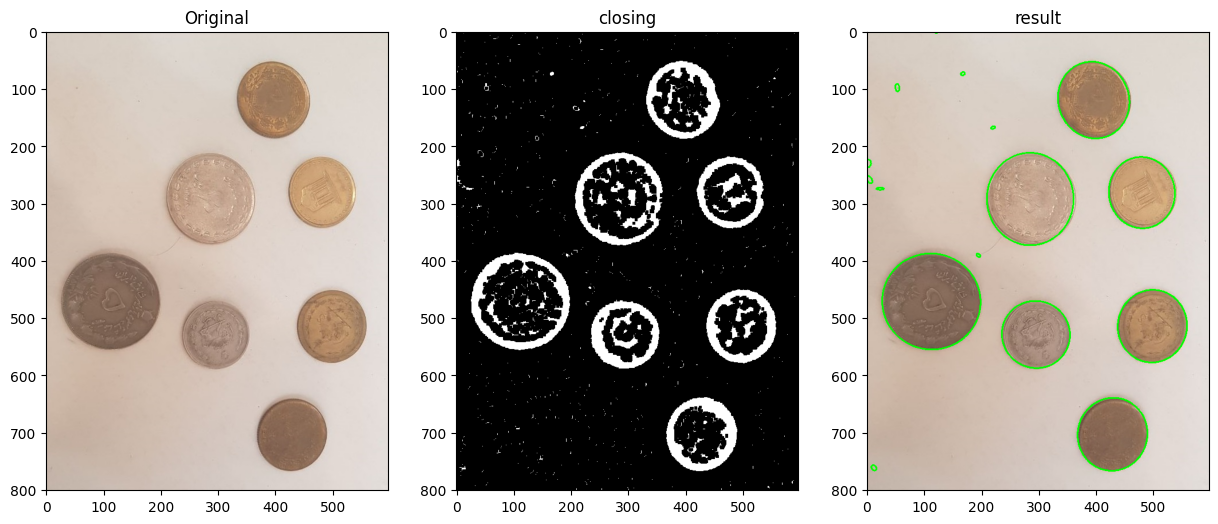

In [8]:
image = cv2.imread("images/old-iranian-coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0)  # Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

drawing_image = image.copy()
for cnt in contours:
    if len(cnt) < 5:
        continue
    if cv2.contourArea(cnt) < 10:  # Filter small contours by area
        continue
    
    ellipse = cv2.fitEllipse(cnt)
    
    # Debugging print statements
    print(f"Contour length: {len(cnt)}")
    print(f"Ellipse parameters: center={ellipse[0]}, axes={ellipse[1]}, angle={ellipse[2]}")
    
    # Check if the dimensions are non-negative and valid
    if ellipse[1][0] < 0 or ellipse[1][1] < 0:
        print(f"Invalid ellipse dimensions: {ellipse[1]}")
        continue
    
    cv2.ellipse(drawing_image, ellipse, (0, 255, 0), 2)

plt.figure(figsize=[15, 15])

plt.subplot(131);plt.imshow(image[..., ::-1]);plt.title("Original")
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing")
plt.subplot(133);plt.imshow(drawing_image[..., ::-1]);plt.title("result")
plt.show()

## 4- Finding Contours

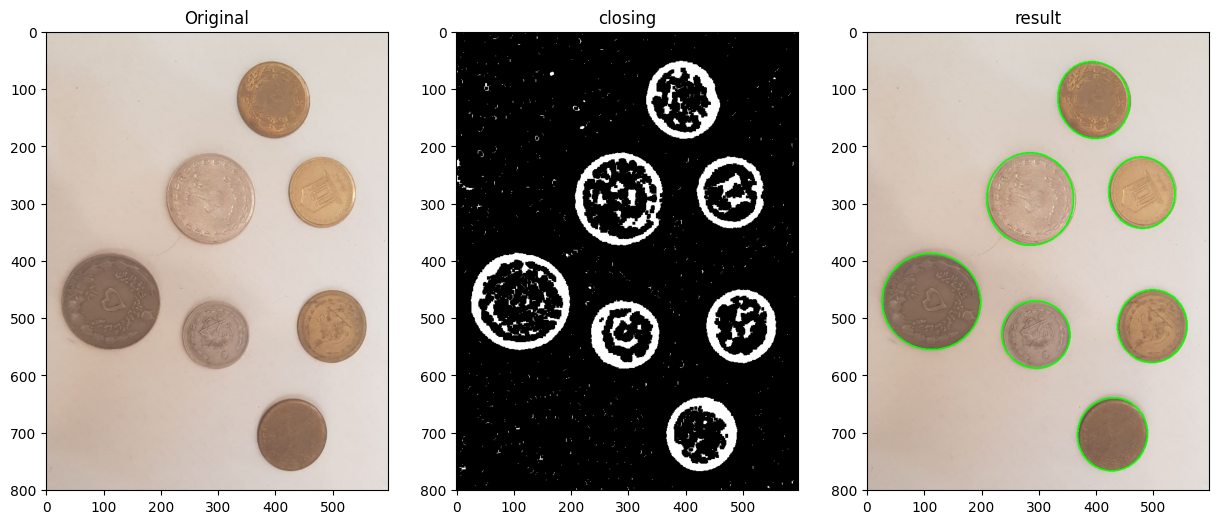

In [6]:
image = cv2.imread("images/old-iranian-coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    if len(cnt) < 100: #100 is more probable to be a circle!
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original")
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing")
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result")

## 5- Calculate Area

- Test 1

Text(0.5, 1.0, 'result')

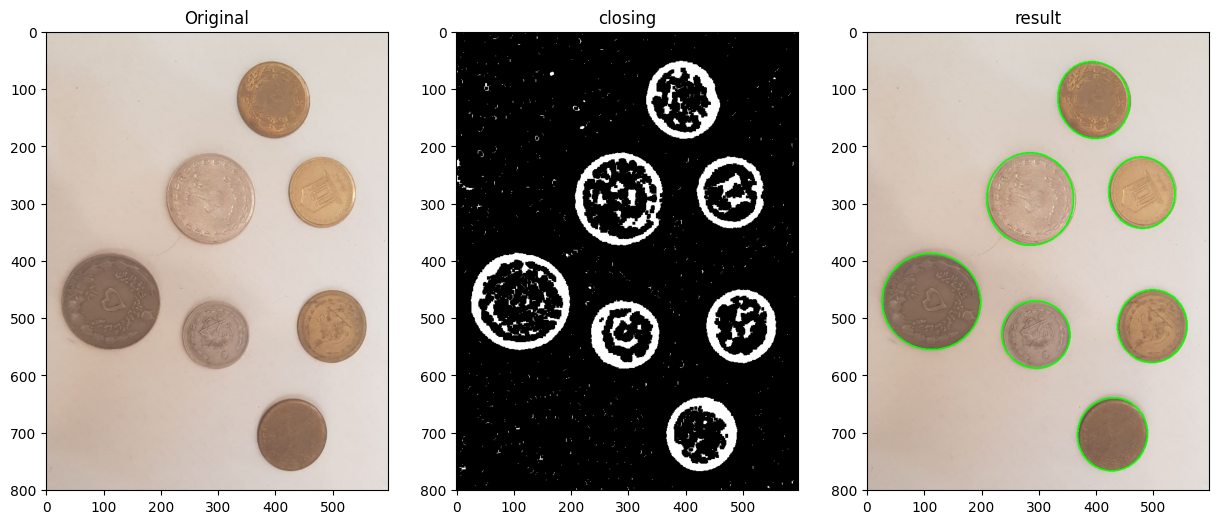

In [9]:
image = cv2.imread("images/old-iranian-coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 5000 or area > 50000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original")
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing")
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result")

- Test 2

Text(0.5, 1.0, 'result')

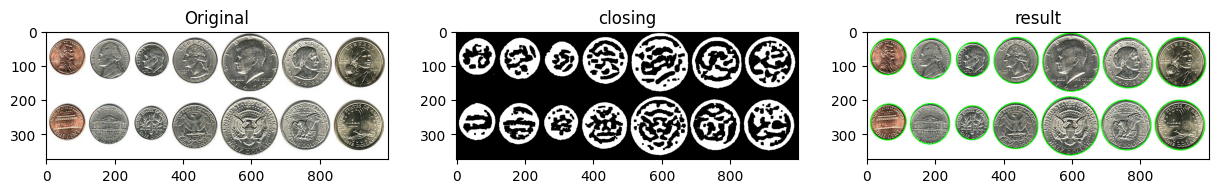

In [10]:
image = cv2.imread("images/money.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 5000 or area > 50000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original")
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing")
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result")

- Test 3

Text(0.5, 1.0, 'result')

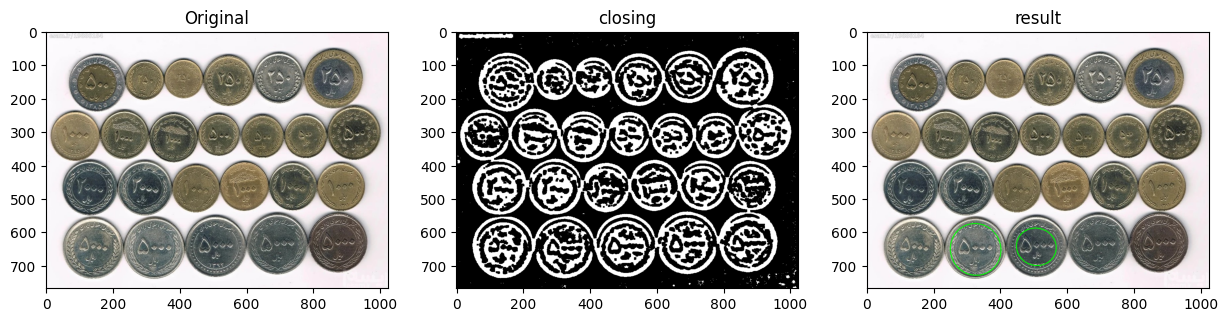

In [11]:
image = cv2.imread("images/iranian-coin.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 5000 or area > 50000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original")
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing")
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result")